In [7]:
#G=graphs.PetersenGraph()
#print(G.neighbors(v))
#G.plot(vertex_colors={'red':S})

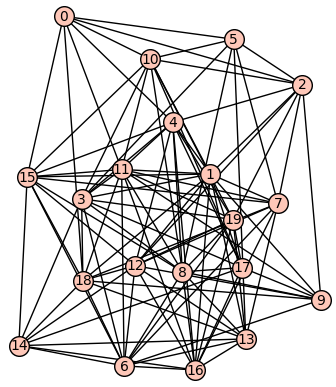

245.0
None


In [25]:
# ============
# Exercice 1 : 
# ============

def CS_PLNE(G, c):
    p = MixedIntegerLinearProgram(maximization=False)
    V = p.new_variable(nonnegative=True, integer=True)
    p.set_objective(sum(c[v] * V[v] for v in G.vertices()))
    
    for e in G.edges():
        p.add_constraint(V[e[0]] + V[e[1]] >= 1)
    
    for v in G.vertices():
        p.add_constraint(V[v] <= 1)
    
    solution = p.solve()
    print(solution)


c = {}
G = graphs.RandomGNP(20,0.5)
for i in G.vertices():
    c[i] = randint(1,50)
    
G.show()
print(CS_PLNE(G,c))

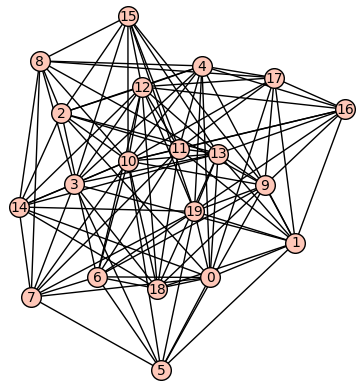

TypeError: 'float' object is not subscriptable

In [40]:
# ============
# Exercice 2 :
# ============

#def PL(G, c):
    #p = MixedIntegerLinearProgram(maximization=False)
    #V = p.new_variable(nonnegative=True)
    #p.set_objective(sum(c[v] * V[v] for v in G.vertices()))
    
    #for e in G.edges():
        #p.add_constraint(V[e[0]] + V[e[1]] >= 1)
    
    #for v in G.vertices():
        #p.add_constraint(V[v] <= 1)
    
    #solution = p.solve()
    #print(solution)
    #return p.solve()


def CS_arrondi(G,c) :
    p = MixedIntegerLinearProgram(maximization=False)
    V = p.new_variable(nonnegative=True)
    p.set_objective(sum(c[v] * V[v] for v in G.vertices()))
    
    val = 0.5
    for e in G.edges():
        p.add_constraint(V[e[0]] + V[e[1]] >= 1)
    
    for v in G.vertices():
        p.add_constraint(V[v] <= 1)
        
    sol = p.solve()
    
    s = []
    
    for v in G.vertices() : 
        if p.get_values[sol[v]] :
            s.append(v)
            
    
    return s
    

    
G = graphs.RandomGNP(20,0.5)
for i in G.vertices():
    c[i] = randint(1,50)
    
G.show()
print(CS_arrondi(G,c))
        